# Imports

In [1]:
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import scipy.misc
import time

import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec



Instructions for updating:
non-resource variables are not supported in the long term


# Problem 1

In [2]:
# generate original training and test data
img_size = 28
n_classes = 10

#MNIST data image of shape 28*28=784
input_size = 784

# 0-9 digits recognition (labels)
output_size = 10



In [3]:
#------------------------------------------------------------
#option 1: load MNIST dataset 
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("data/", one_hot=True)


#------------------------------------------------------------
#option 2: load MNIST dataset 
print('\nLoading MNIST')
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, [-1, img_size*img_size])
x_train = x_train.astype(np.float32)/255

x_test = np.reshape(x_test, [-1, img_size*img_size])
x_test = x_test.astype(np.float32)/255

to_categorical = tf.keras.utils.to_categorical 
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('\nSpliting data')

ind = np.random.permutation(x_train.shape[0])
x_train, y_train = x_train[ind], y_train[ind]

# 10% for validation 
validatationPct = 0.1
n = int(x_train.shape[0] * (1-validatationPct))
x_valid = x_train[n:]
x_train = x_train[:n]
#
y_valid = y_train[n:]
y_train = y_train[:n]

train_num_examples = x_train.shape[0]
valid_num_examples = x_valid.shape[0]
test_num_examples  = x_test.shape[0]

print(train_num_examples, valid_num_examples, test_num_examples)


Loading MNIST

Spliting data
54000 6000 10000


# Parameters

In [4]:
# Global Parameters
#--------------------------------
# learning rate
learning_rate = 0.05

#training_epochs = 1000
#batch_size = 30

training_epochs = 100
batch_size = 50

display_step = 10

#Network Architecture
# -----------------------------------------
#
# Two hidden layers
#
#------------------------------------------
# number of neurons in layer 1
n_hidden_1 = 50
# number of neurons in layer 2
n_hidden_2 = 50
# number of neurons in layer 3
n_hidden_3 = 50
# number of neurons in layer 4
n_hidden_4 = 50


#MNIST data image of shape 28*28=784
input_size = 784

# 0-9 digits recognition (labels)
output_size = 10

# Define Layer Function

In [5]:
def layerreLU(x, weight_shape, bias_shape):
    """
    Defines the network layers
    input:
        - x: input vector of the layer
        - weight_shape: shape the the weight maxtrix
        - bias_shape: shape of the bias vector
    output:
        - output vector of the layer after the matrix multiplication and non linear transformation
    """
    
    # comes from the study by He et al. for ReLU layers
    w_std = (2.0/weight_shape[0])**0.5
    #print(weight_shape[0])
    #w_std = 0.5;

    #initialization of the weights
    #you can try either
    w_0 = tf.random_normal_initializer(stddev=w_std)
    #w_0 = tf.random_uniform_initializer(minval=-1,maxval=1)

    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    # different activation functions
    # you can try
    # (1) linear activation (not a good idea)
    #return tf.matmul(x, W) + b
    # (2) tanh activation
    #return tf.nn.tanh(tf.matmul(x, W) + b)
    # (3) sigmoid activation
    #return tf.nn.sigmoid(tf.matmul(x, W) + b)
    # (4) relu activation
    return tf.nn.relu(tf.matmul(x, W) + b)


In [6]:
def layertanh(x, weight_shape, bias_shape):
    """
    Defines the network layers
    input:
        - x: input vector of the layer
        - weight_shape: shape the the weight maxtrix
        - bias_shape: shape of the bias vector
    output:
        - output vector of the layer after the matrix multiplication and non linear transformation
    """
    
    # comes from the study by He et al. for ReLU layers
    w_std = (2.0/weight_shape[0])**0.5
    #print(weight_shape[0])
    #w_std = 0.5;

    #initialization of the weights
    #you can try either
    w_0 = tf.random_normal_initializer(stddev=w_std)
    #w_0 = tf.random_uniform_initializer(minval=-1,maxval=1)

    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    # different activation functions
    # you can try
    # (1) linear activation (not a good idea)
    #return tf.matmul(x, W) + b
    # (2) tanh activation
    return tf.nn.tanh(tf.matmul(x, W) + b)
    # (3) sigmoid activation
    #return tf.nn.sigmoid(tf.matmul(x, W) + b)
    # (4) relu activation
    #return tf.nn.relu(tf.matmul(x, W) + b)


In [7]:
def layersigmoid(x, weight_shape, bias_shape):
    """
    Defines the network layers
    input:
        - x: input vector of the layer
        - weight_shape: shape the the weight maxtrix
        - bias_shape: shape of the bias vector
    output:
        - output vector of the layer after the matrix multiplication and non linear transformation
    """
    
    # comes from the study by He et al. for ReLU layers
    w_std = (2.0/weight_shape[0])**0.5
    #print(weight_shape[0])
    #w_std = 0.5;

    #initialization of the weights
    #you can try either
    w_0 = tf.random_normal_initializer(stddev=w_std)
    #w_0 = tf.random_uniform_initializer(minval=-1,maxval=1)

    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    # different activation functions
    # you can try
    # (1) linear activation (not a good idea)
    #return tf.matmul(x, W) + b
    # (2) tanh activation
    #return tf.nn.tanh(tf.matmul(x, W) + b)
    # (3) sigmoid activation
    return tf.nn.sigmoid(tf.matmul(x, W) + b)
    # (4) relu activation
    #return tf.nn.relu(tf.matmul(x, W) + b)


In [8]:
def layerleaky(x, weight_shape, bias_shape):
    """
    Defines the network layers
    input:
        - x: input vector of the layer
        - weight_shape: shape the the weight maxtrix
        - bias_shape: shape of the bias vector
    output:
        - output vector of the layer after the matrix multiplication and non linear transformation
    """
    
    # comes from the study by He et al. for ReLU layers
    w_std = (2.0/weight_shape[0])**0.5
    #print(weight_shape[0])
    #w_std = 0.5;

    #initialization of the weights
    #you can try either
    w_0 = tf.random_normal_initializer(stddev=w_std)
    #w_0 = tf.random_uniform_initializer(minval=-1,maxval=1)

    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    # different activation functions
    # you can try
    # (1) linear activation (not a good idea)
    #return tf.matmul(x, W) + b
    # (2) tanh activation
    #return tf.nn.tanh(tf.matmul(x, W) + b)
    # (3) sigmoid activation
    #return tf.nn.sigmoid(tf.matmul(x, W) + b)
    # (4) relu activation
    #return tf.nn.relu(tf.matmul(x, W) + b)
    return tf.nn.leaky_relu(tf.matmul(x, W) + b)

# Define Inference Function

In [9]:
def inference1(x):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layertanh(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layersigmoid(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layerleaky(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layersigmoid(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layersigmoid(hidden_4, [n_hidden_4, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [10]:
def inference2(x):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layertanh(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layersigmoid(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layersigmoid(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layerreLU(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layerreLU(hidden_4, [n_hidden_4, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [11]:
def inference5(x):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layerleaky(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layerleaky(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layerleaky(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layerleaky(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layerleaky(hidden_4, [n_hidden_4, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [12]:
def inference6(x):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layertanh(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layertanh(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layertanh(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layertanh(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layertanh(hidden_4, [n_hidden_4, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [13]:
def inference3(x):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layerleaky(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layerleaky(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layerleaky(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_4"):
#         hidden_4 = layerleaky(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
#         #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layerleaky(hidden_3, [n_hidden_3, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [14]:
def inference4(x):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layersigmoid(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layersigmoid(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layersigmoid(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_4"):
#         hidden_4 = layerleaky(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
#         #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layersigmoid(hidden_3, [n_hidden_3, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

# Define Loss Function

## Define First Loss 

In [19]:
def loss_1(output, y):
    """
    computes the average error per data sample 
    by computing the cross-entropy loss over a minibatch
    intput:
        - output: the output of the inference function 
        - y: true value of the sample batch
        
        the two have the same shape (batch_size * num_of_classes)
    output:
        - loss: loss of the corresponding batch (scalar tensor)
    
    """
    dot_product = y * tf.log(output)
    
    #tf.reduce_sum: Computes the sum of elements across dimensions of a tensor.
    xentropy = -tf.reduce_sum(dot_product, 1)
    
    #tf.reduce_mean: Computes the mean of elements across dimensions of a tensor.
    loss = tf.reduce_mean(xentropy)

    return loss

## Define Second Loss

In [18]:
def loss_2(output, y):
    """
    Computes softmax cross entropy between logits and labels and then the loss 
    
    intput:
        - output: the output of the inference function 
        - y: true value of the sample batch
        
        the two have the same shape (batch_size * num_of_classes)
    output:
        - loss: loss of the corresponding batch (scalar tensor)
    
    """

    #mean square error
    #loss = tf.reduce_mean(tf.reduce_sum(tf.square(y-output)))
    
    #Computes softmax cross entropy between logits and labels.
    xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)

    return loss

# Define the optimizer and training target

In [17]:
def training(cost, global_step):
    """
    defines the necessary elements to train the network
    
    intput:
        - cost: the cost is the loss of the corresponding batch
        - global_step: number of batch seen so far, it is incremented by one 
        each time the .minimize() function is called
    """

    tf.summary.scalar("cost", cost)
    
    # tf.train.GradientDescentOptimizer
    # will use different optimization routines 
    optimizer = tf.train.RMSPropOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)

    return train_op

# Define evaluation method

In [16]:
def evaluate(output, y):
    """
    evaluates the accuracy on the validation set 
    input:
        -output: prediction vector of the network for the validation set
        -y: true value for the validation set
    output:
        - accuracy: accuracy on the validation set (scalar between 0 and 1)
    """
    #correct prediction is a binary vector which equals one when the output and y match
    #otherwise the vector equals 0
    #tf.cast: change the type of a tensor into another one
    #then, by taking the mean of the tensor, we directly have the average score, so the accuracy
    
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    tf.summary.scalar("validation_error", (1.0 - accuracy))

    return accuracy

# Main function

# Problem 1 (1)

In [19]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/Frederica/logs/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("Yufei_Mnist_01"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference1(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'Yufei_Mnist_01/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                #total_batch = int(mnist.train.num_examples/batch_size)
                total_batch = int((train_num_examples+batch_size-1) / batch_size)
            
            
                # Loop over all batches
                for i in range(total_batch):

                    #option 1
                    #minibatch_x, minibatch_y = mnist.train.next_batch(batch_size, shuffle=False)
                    
                    #option 2
                    start = i * batch_size
                    end = min(train_num_examples, start + batch_size)
                    minibatch_x = x_train[start:end]
                    minibatch_y = y_train[start:end]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #option 1
                    #accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    
                    #option 2
                    accuracy = sess.run(eval_op, feed_dict={x: x_valid, y: y_valid})
                    
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'Yufei_Mnist_01/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            
            #accuracy evaluated with the whole test dataset
            
            #option 1
            #accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            
            #option 2
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            #plt.plot(loss_trace)
            #plt.title('Cross Entropy Loss')
            #plt.xlabel('epoch')
            #plt.ylabel('loss')
            #plt.show()

Weight Matrix: <tf.Variable 'Yufei_Mnist_01/hidden_layer_1/W:0' shape=(784, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/hidden_layer_1/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_01/hidden_layer_2/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/hidden_layer_2/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_01/hidden_layer_3/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/hidden_layer_3/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_01/hidden_layer_4/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/hidden_layer_4/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_01/output/W:0' shape=(50, 10) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/output/b:0' shape=(10,) dtype=float32_ref>
Instructions for updating:

Future major versions of TensorF

# Problem 1 (2)

In [20]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/Frederica/logs/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("Yufei_Mnist_02"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference2(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'Yufei_Mnist_02/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                #total_batch = int(mnist.train.num_examples/batch_size)
                total_batch = int((train_num_examples+batch_size-1) / batch_size)
            
            
                # Loop over all batches
                for i in range(total_batch):

                    #option 1
                    #minibatch_x, minibatch_y = mnist.train.next_batch(batch_size, shuffle=False)
                    
                    #option 2
                    start = i * batch_size
                    end = min(train_num_examples, start + batch_size)
                    minibatch_x = x_train[start:end]
                    minibatch_y = y_train[start:end]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #option 1
                    #accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    
                    #option 2
                    accuracy = sess.run(eval_op, feed_dict={x: x_valid, y: y_valid})
                    
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'Yufei_Mnist_02/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            
            #accuracy evaluated with the whole test dataset
            
            #option 1
            #accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            
            #option 2
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            #plt.plot(loss_trace)
            #plt.title('Cross Entropy Loss')
            #plt.xlabel('epoch')
            #plt.ylabel('loss')
            #plt.show()

Weight Matrix: <tf.Variable 'Yufei_Mnist_02/hidden_layer_1/W:0' shape=(784, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/hidden_layer_1/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_02/hidden_layer_2/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/hidden_layer_2/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_02/hidden_layer_3/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/hidden_layer_3/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_02/hidden_layer_4/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/hidden_layer_4/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_02/output/W:0' shape=(50, 10) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/output/b:0' shape=(10,) dtype=float32_ref>
Instructions for updating:

Future major versions of TensorF

# Problem 1 (3)

In [30]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/Frederica/logs/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer_3"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference3(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer_3/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                #total_batch = int(mnist.train.num_examples/batch_size)
                total_batch = int((train_num_examples+batch_size-1) / batch_size)
            
            
                # Loop over all batches
                for i in range(total_batch):

                    #option 1
                    #minibatch_x, minibatch_y = mnist.train.next_batch(batch_size, shuffle=False)
                    
                    #option 2
                    start = i * batch_size
                    end = min(train_num_examples, start + batch_size)
                    minibatch_x = x_train[start:end]
                    minibatch_y = y_train[start:end]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #option 1
                    #accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    
                    #option 2
                    accuracy = sess.run(eval_op, feed_dict={x: x_valid, y: y_valid})
                    
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer_3/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            
            #accuracy evaluated with the whole test dataset
            
            #option 1
            #accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            
            #option 2
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            #plt.plot(loss_trace)
            #plt.title('Cross Entropy Loss')
            #plt.xlabel('epoch')
            #plt.ylabel('loss')
            #plt.show()

Weight Matrix: <tf.Variable 'multi_layer_3/hidden_layer_1/W:0' shape=(784, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_3/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_3/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_3/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_3/hidden_layer_3/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_3/hidden_layer_3/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_3/output/W:0' shape=(50, 10) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_3/output/b:0' shape=(10,) dtype=float32>
Epoch: 000 cost function= 7.1042833  Validation Error: 0.4700000286102295
Epoch: 010 cost function= 1.7126103  Validation Error: 0.20550000667572021
Epoch: 020 cost function= 1.4480026  Validation Error: 0.08383333683013916
Epoch: 030 cost function= 1.6344172  Validation Error: 0.1411666870

# Problem 1 (4)

In [20]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/Frederica/logs/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer_3"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference4(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer_3/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                #total_batch = int(mnist.train.num_examples/batch_size)
                total_batch = int((train_num_examples+batch_size-1) / batch_size)
            
            
                # Loop over all batches
                for i in range(total_batch):

                    #option 1
                    #minibatch_x, minibatch_y = mnist.train.next_batch(batch_size, shuffle=False)
                    
                    #option 2
                    start = i * batch_size
                    end = min(train_num_examples, start + batch_size)
                    minibatch_x = x_train[start:end]
                    minibatch_y = y_train[start:end]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #option 1
                    #accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    
                    #option 2
                    accuracy = sess.run(eval_op, feed_dict={x: x_valid, y: y_valid})
                    
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer_3/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            
            #accuracy evaluated with the whole test dataset
            
            #option 1
            #accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            
            #option 2
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            #plt.plot(loss_trace)
            #plt.title('Cross Entropy Loss')
            #plt.xlabel('epoch')
            #plt.ylabel('loss')
            #plt.show()

Weight Matrix: <tf.Variable 'multi_layer_3/hidden_layer_1/W:0' shape=(784, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_3/hidden_layer_1/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_3/hidden_layer_2/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_3/hidden_layer_2/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_3/hidden_layer_3/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_3/hidden_layer_3/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_3/output/W:0' shape=(50, 10) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_3/output/b:0' shape=(10,) dtype=float32_ref>
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Call initializer instance with the dtype 

# Problem 1 (5)

In [32]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/Frederica/logs/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer_4"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference5(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer_4/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                #total_batch = int(mnist.train.num_examples/batch_size)
                total_batch = int((train_num_examples+batch_size-1) / batch_size)
            
            
                # Loop over all batches
                for i in range(total_batch):

                    #option 1
                    #minibatch_x, minibatch_y = mnist.train.next_batch(batch_size, shuffle=False)
                    
                    #option 2
                    start = i * batch_size
                    end = min(train_num_examples, start + batch_size)
                    minibatch_x = x_train[start:end]
                    minibatch_y = y_train[start:end]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #option 1
                    #accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    
                    #option 2
                    accuracy = sess.run(eval_op, feed_dict={x: x_valid, y: y_valid})
                    
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer_4/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            
            #accuracy evaluated with the whole test dataset
            
            #option 1
            #accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            
            #option 2
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            #plt.plot(loss_trace)
            #plt.title('Cross Entropy Loss')
            #plt.xlabel('epoch')
            #plt.ylabel('loss')
            #plt.show()

Weight Matrix: <tf.Variable 'multi_layer_4/hidden_layer_1/W:0' shape=(784, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_4/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_4/hidden_layer_3/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/hidden_layer_3/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_4/hidden_layer_4/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/hidden_layer_4/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_4/output/W:0' shape=(50, 10) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/output/b:0' shape=(10,) dtype=float32>
Epoch: 000 cost function= 53.4681321  Validation Error: 0.6111666560173035
Epoch: 010 cost function= 6.9534892

# Problem 1 (6)

In [33]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/Frederica/logs/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer_4"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference6(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer_4/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                #total_batch = int(mnist.train.num_examples/batch_size)
                total_batch = int((train_num_examples+batch_size-1) / batch_size)
            
            
                # Loop over all batches
                for i in range(total_batch):

                    #option 1
                    #minibatch_x, minibatch_y = mnist.train.next_batch(batch_size, shuffle=False)
                    
                    #option 2
                    start = i * batch_size
                    end = min(train_num_examples, start + batch_size)
                    minibatch_x = x_train[start:end]
                    minibatch_y = y_train[start:end]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #option 1
                    #accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    
                    #option 2
                    accuracy = sess.run(eval_op, feed_dict={x: x_valid, y: y_valid})
                    
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer_4/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            
            #accuracy evaluated with the whole test dataset
            
            #option 1
            #accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            
            #option 2
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            #plt.plot(loss_trace)
            #plt.title('Cross Entropy Loss')
            #plt.xlabel('epoch')
            #plt.ylabel('loss')
            #plt.show()

Weight Matrix: <tf.Variable 'multi_layer_4/hidden_layer_1/W:0' shape=(784, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_4/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_4/hidden_layer_3/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/hidden_layer_3/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_4/hidden_layer_4/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/hidden_layer_4/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'multi_layer_4/output/W:0' shape=(50, 10) dtype=float32>
Bias Vector: <tf.Variable 'multi_layer_4/output/b:0' shape=(10,) dtype=float32>
Epoch: 000 cost function= 1.5617042  Validation Error: 0.46700000762939453
Epoch: 010 cost function= 2.0252623

# Problem 2

In [160]:
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior
tf.compat.v1.disable_eager_execution()
import scipy.misc
import time

import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec



In [161]:
# The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images 
# that are commonly used to train machine learning and computer vision algorithms

# generate original training and test data
# The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, 
# with 6000 images per class. 
# There are 50000 training images and 10000 test images.
img_size = 32
img_chan = 3
n_classes = 10

learning_rate = 0.05
#global_step = 
input_size = 32*32*3
output_size = 10


print('\nLoading CIFAR10')

cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#X_train = np.reshape(X_train, [-1, img_size, img_size, img_chan])
X_train = np.reshape(X_train, [-1, img_size*img_size*3])
X_train = X_train.astype(np.float32) / 255
#X_test = np.reshape(X_test, [-1, img_size, img_size, img_chan])
X_test = np.reshape(X_test, [-1, img_size*img_size*3])
X_test = X_test.astype(np.float32) / 255

to_categorical = tf.keras.utils.to_categorical 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('\nSpliting data')

ind = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train[ind], y_train[ind] 

VALIDATION_SPLIT = 0.1
n = int(X_train.shape[0] * (1-VALIDATION_SPLIT))
X_valid = X_train[n:]
X_train = X_train[:n]
y_valid = y_train[n:]
y_train = y_train[:n] 




Loading CIFAR10

Spliting data


In [162]:
def inference11(x,logits = False):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layertanh(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layersigmoid(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layerleaky(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layersigmoid(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layersigmoid(hidden_4, [n_hidden_4, output_size], [output_size])
        #print([n_hidden_2, output_size])
    y = tf.nn.softmax(output, name='ybar')
    
    if logits:
        return y, output
    return output

In [163]:
def inference22(x,logits = False):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layertanh(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layersigmoid(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layersigmoid(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layerreLU(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layerreLU(hidden_4, [n_hidden_4, output_size], [output_size])
        #print([n_hidden_2, output_size])
    y = tf.nn.softmax(output, name='ybar')
    
    if logits:
        return y, output
    return output

In [164]:
def inference33(x,logits = False):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layerleaky(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layerleaky(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layerleaky(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_4"):
#         hidden_4 = layerleaky(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
#         #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layerleaky(hidden_3, [n_hidden_3, output_size], [output_size])
        #print([n_hidden_2, output_size])
    y = tf.nn.softmax(output, name='ybar')
    
    if logits:
        return y, output
    return output

In [165]:
def inference44(x,logits = False):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layersigmoid(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layersigmoid(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layersigmoid(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_4"):
#         hidden_4 = layerleaky(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
#         #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layersigmoid(hidden_3, [n_hidden_3, output_size], [output_size])
        #print([n_hidden_2, output_size])
    y = tf.nn.softmax(output, name='ybar')
    
    if logits:
        return y, output
    return output

In [166]:
def inference55(x,logits = False):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layerleaky(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layerleaky(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layerleaky(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layerleaky(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layerleaky(hidden_4, [n_hidden_4, output_size], [output_size])
        #print([n_hidden_2, output_size])
    y = tf.nn.softmax(output, name='ybar')
    
    if logits:
        return y, output
    return output

In [167]:
def inference66(x,logits = False):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layertanh(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layertanh(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layertanh(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layertanh(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        #print([n_hidden_1, n_hidden_2])
        
#     with tf.variable_scope("hidden_layer_5"):
#         hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
#         #print([n_hidden_1, n_hidden_2])
     
    with tf.variable_scope("output"):
        output = layertanh(hidden_4, [n_hidden_4, output_size], [output_size])
        #print([n_hidden_2, output_size])
    y = tf.nn.softmax(output, name='ybar')
    
    if logits:
        return y, output
    return output

In [168]:
class Dummy:
    pass
env = Dummy()

In [169]:
def fgm(inference, x, eps=0.01, epochs=1, sign=True, clip_min=0., clip_max=1.):
    """
    Fast gradient method.

    See https://arxiv.org/abs/1412.6572 and https://arxiv.org/abs/1607.02533
    for details.  This implements the revised version since the original FGM
    has label leaking problem (https://arxiv.org/abs/1611.01236).

    :param model: A wrapper that returns the output as well as logits.
    :param x: The input placeholder.
    :param eps: The scale factor for noise.
    :param epochs: The maximum epoch to run.
    :param sign: Use gradient sign if True, otherwise use gradient value.
    :param clip_min: The minimum value in output.
    :param clip_max: The maximum value in output.

    :return: A tensor, contains adversarial samples for each input.
    """
    xadv = tf.identity(x)

    ybar = inference(xadv)
    yshape = ybar.get_shape().as_list()
    ydim = yshape[1]

    indices = tf.argmax(ybar, axis=1)
    target = tf.cond(
        tf.equal(ydim, 1),
        lambda: tf.nn.relu(tf.sign(ybar - 0.5)),
        lambda: tf.one_hot(indices, ydim, on_value=1.0, off_value=0.0))

    if 1 == ydim:
        loss_fn = tf.nn.sigmoid_cross_entropy_with_logits
    else:
        loss_fn = tf.nn.softmax_cross_entropy_with_logits

    if sign:
        noise_fn = tf.sign
    else:
        noise_fn = tf.identity

    eps = tf.abs(eps)

    def _cond(xadv, i):
        return tf.less(i, epochs)

    def _body(xadv, i):
        ybar, logits = inference(xadv, logits=True)
        loss = loss_fn(labels=target, logits=logits)
        dy_dx, = tf.gradients(loss, xadv)
        xadv = tf.stop_gradient(xadv + eps*noise_fn(dy_dx))
        xadv = tf.clip_by_value(xadv, clip_min, clip_max)
        return xadv, i+1

    xadv, _ = tf.while_loop(_cond, _body, (xadv, 0), back_prop=False,
                            name='fast_gradient')
    return xadv

In [170]:
with tf.variable_scope('model'):
    
    env.x = tf.placeholder(tf.float32, (None, input_size), name='x')
    env.y = tf.placeholder(tf.float32, (None, n_classes), name='y')
    
    #env.training = tf.placeholder_with_default(False, (), name='mode')
    env.ybar, logits = inference11(env.x, logits=True)

    with tf.variable_scope('acc'):
        count = tf.equal(tf.argmax(env.y, axis=1), tf.argmax(env.ybar, axis=1))
        env.acc = tf.reduce_mean(tf.cast(count, tf.float32), name='acc')

    with tf.variable_scope('loss'):
        xent = tf.nn.softmax_cross_entropy_with_logits(labels=env.y, logits=logits)
        env.loss = tf.reduce_mean(xent, name='loss')
        
 
    with tf.variable_scope('train_op'):
        optimizer = tf.train.RMSPropOptimizer(learning_rate)
        env.train_op = optimizer.minimize(env.loss)

with tf.variable_scope('model', reuse=tf.AUTO_REUSE):
    env.fgsm_eps = tf.placeholder(tf.float32, (), name='fgsm_eps')
    env.fgsm_epochs = tf.placeholder(tf.int32, (), name='fgsm_epochs')
    env.x_fgsm = fgm(inference11, env.x, epochs=env.fgsm_epochs, eps=env.fgsm_eps)

Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_3/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_3/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_4/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_4/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/output/W:0' shape=(50, 10) dtype=float32>
Bias Vector: <tf.Variable 'model/output/b:0' shape=(10,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Var

In [171]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

In [172]:
def train(sess, env, X_data, y_data, X_valid=None, y_valid=None, epochs=1,
          shuffle=True, batch_size=128):

    print('\nTrain model')
    n_sample = X_data.shape[0]
    n_batch = int((n_sample+batch_size-1) / batch_size)
    for epoch in range(epochs):
        print('\nEpoch {0}/{1}'.format(epoch + 1, epochs))

        #if shuffle:
        #    print('\nShuffling data')
        #    ind = np.arange(n_sample)
        #    np.random.shuffle(ind)
        #    X_data = X_data[ind]
        #    y_data = y_data[ind]

        for batch in range(n_batch):
            print(' batch {0}/{1}'.format(batch + 1, n_batch))
            start = batch * batch_size
            end = min(n_sample, start + batch_size)
            sess.run(env.train_op, feed_dict={env.x: X_data[start:end],
                                              env.y: y_data[start:end]})
        if X_valid is not None:
            evaluate(sess, env, X_valid, y_valid)


def evaluate(sess, env, X_data, y_data, batch_size=128):
    """
    Evaluate TF model by running env.loss and env.acc.
    """
    print('\nEvaluating')

    n_sample = X_data.shape[0]
    n_batch = int((n_sample+batch_size-1) / batch_size)
    loss, acc = 0, 0

    for batch in range(n_batch):
        print(' batch {0}/{1}'.format(batch + 1, n_batch))
        start = batch * batch_size
        end = min(n_sample, start + batch_size)
        cnt = end - start
        batch_loss, batch_acc = sess.run(
            [env.loss, env.acc],
            feed_dict={env.x: X_data[start:end],
                       env.y: y_data[start:end]})
        loss += batch_loss * cnt
        acc += batch_acc * cnt
    loss /= n_sample
    acc /= n_sample

    print(' loss: {0:.4f} acc: {1:.4f}'.format(loss, acc))
    return loss, acc





def predict(sess, env, X_data, batch_size=None):
    """
    Predict the probability for each label of X_data. Return a n*m matrix, n = number of samples, m = number of labels
    """
    print('\nPredicting')
    n_classes = env.ybar.get_shape().as_list()[1]

    n_sample = X_data.shape[0]
    yval = np.empty((n_sample, n_classes))
    if batch_size:
        n_batch = int((n_sample+batch_size-1) / batch_size)
        for batch in range(n_batch):
            print(' batch {0}/{1}'.format(batch + 1, n_batch))
            start = batch * batch_size
            end = min(n_sample, start + batch_size)
            y_batch = sess.run(env.ybar, feed_dict={env.x: X_data[start:end]})
            yval[start:end] = y_batch
    else:
        yval = sess.run(env.ybar, feed_dict={env.x: X_data})

    return yval


#%%
def make_fgsm(sess, env, X_data, epochs=1, eps=0.01, batch_size=128):
    """
    Generate FGSM by running env.x_fgsm.
    """
    print('\nMaking adversarials via FGSM')

    n_sample = X_data.shape[0]
    n_batch = int((n_sample + batch_size - 1) / batch_size)    #the number of n_batch is 79
    X_adv = np.empty_like(X_data)

    for batch in range(n_batch):
        print(' batch {0}/{1}'.format(batch + 1, n_batch))
        start = batch * batch_size
        end = min(n_sample, start + batch_size)
        adv = sess.run(env.x_fgsm, feed_dict={
            env.x: X_data[start:end],
            env.fgsm_eps: eps,
            env.fgsm_epochs: epochs})
        X_adv[start:end] = adv
    print()

    return X_adv

# Problem 2 (1)

In [173]:
train(sess, env, X_train, y_train, X_valid, y_valid, epochs=5)


Train model

Epoch 1/5
 batch 1/352
 batch 2/352
 batch 3/352
 batch 4/352
 batch 5/352
 batch 6/352
 batch 7/352
 batch 8/352
 batch 9/352
 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 55/352
 batch 56/352
 batch 57/352
 batch 58/352
 batch 59/352
 batch 60/352
 batch 61/352
 batch 62/352
 batch 63/352
 batch 64/352
 batch 65/352
 batch 66/352
 batch 67/352
 batch 68/352
 batch 69/352
 batch 70/352
 batc

 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227/352
 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238/352
 batch 239/352
 batch 240/352
 batch 241/352
 batch 242/352
 batch 243/352
 batch 244/352
 batch 245/352
 batch 246/352
 batch 247/352
 batch 248/352
 batch 249/352
 batch 250/352
 batch 251/352
 batch 252/352
 batch 253/352
 batch 254/352
 batch 255/352
 batch 256/352
 batch 257/352
 batch 258/352
 batch 259/352
 batch 260/352
 batch 261/352
 batch 262/352
 batch 263/352
 batch 264/352
 batch 265/352
 batch 266/352
 batch 267/352
 batch 268/352
 batch 269/352
 batch 270/352
 batch 271/352
 batch 272/352
 batch 273/352
 batch 274/352
 batch 275/352
 batch 276/352
 batch 277/352
 batch 278

 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 55/352
 batch 56/352
 batch 57/352
 batch 58/352
 batch 59/352
 batch 60/352
 batch 61/352
 batch 62/352
 batch 63/352
 batch 64/352
 batch 65/352
 batch 66/352
 batch 67/352
 batch 68/352
 batch 69/352
 batch 70/352
 batch 71/352
 batch 72/352
 batch 73/352
 batch 74/352
 batch 75/352
 batch 76/352
 batch 77/352
 batch 78/352
 batch 79/352
 batch 80/352
 batch 81/352
 batch 82/352
 batch 83/352
 batch 84/352
 batch 85/352
 batch 86/352
 batch 87/352
 batch 88/352
 batch 89/352
 batch 90/352
 batch 91/352
 batch 92/352
 batch 93/352
 batch 94/352
 batch 95/352
 batch 96/352
 batch 97/352
 batch 98/352
 batch 99/352
 batch 100/352
 batch 101/352
 batch 102/352
 batch 103/352
 batch 104/352
 batch 105/352
 batch 106/352

 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238/352
 batch 239/352
 batch 240/352
 batch 241/352
 batch 242/352
 batch 243/352
 batch 244/352
 batch 245/352
 batch 246/352
 batch 247/352
 batch 248/352
 batch 249/352
 batch 250/352
 batch 251/352
 batch 252/352
 batch 253/352
 batch 254/352
 batch 255/352
 batch 256/352
 batch 257/352
 batch 258/352
 batch 259/352
 batch 260/352
 batch 261/352
 batch 262/352
 batch 263/352
 batch 264/352
 batch 265/352
 batch 266/352
 batch 267/352
 batch 268/352
 batch 269/352
 batch 270/352
 batch 271/352
 batch 272/352
 batch 273/352
 batch 274/352
 batch 275/352
 batch 276/352
 batch 277/352
 batch 278/352
 batch 279/352
 batch 280/352
 batch 281/352
 batch 282/352
 batch 283/352
 batch 284/352
 batch 285/352
 batch 286/352
 batch 287/352
 batch 288/352
 batch 289/352
 batch 290/352
 batch 291/352
 batch 292/352
 batch 293/352
 batch 294/352
 batch 295/352
 batch 296/352
 batch 297/352
 batch 298/352
 batch 299/352
 batch 300

# Problem 2 (2)

In [107]:
with tf.variable_scope('model'):
    
    env.x = tf.placeholder(tf.float32, (None, input_size), name='x')
    env.y = tf.placeholder(tf.float32, (None, n_classes), name='y')
    
    #env.training = tf.placeholder_with_default(False, (), name='mode')
    env.ybar, logits = inference22(env.x, logits=True)

    with tf.variable_scope('acc'):
        count = tf.equal(tf.argmax(env.y, axis=1), tf.argmax(env.ybar, axis=1))
        env.acc = tf.reduce_mean(tf.cast(count, tf.float32), name='acc')

    with tf.variable_scope('loss'):
        xent = tf.nn.softmax_cross_entropy_with_logits(labels=env.y, logits=logits)
        env.loss = tf.reduce_mean(xent, name='loss')
        
 
    with tf.variable_scope('train_op'):
        optimizer = tf.train.RMSPropOptimizer(learning_rate)
        env.train_op = optimizer.minimize(env.loss)

with tf.variable_scope('model', reuse=tf.AUTO_REUSE):
    env.fgsm_eps = tf.placeholder(tf.float32, (), name='fgsm_eps')
    env.fgsm_epochs = tf.placeholder(tf.int32, (), name='fgsm_epochs')
    env.x_fgsm = fgm(inference22, env.x, epochs=env.fgsm_epochs, eps=env.fgsm_eps)

Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_3/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_3/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_4/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_4/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/output/W:0' shape=(50, 10) dtype=float32>
Bias Vector: <tf.Variable 'model/output/b:0' shape=(10,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Var

In [108]:
train(sess, env, X_train, y_train, X_valid, y_valid, epochs=5)


Train model

Epoch 1/5
 batch 1/352
 batch 2/352
 batch 3/352
 batch 4/352
 batch 5/352
 batch 6/352
 batch 7/352
 batch 8/352
 batch 9/352
 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 55/352
 batch 56/352
 batch 57/352
 batch 58/352
 batch 59/352
 batch 60/352
 batch 61/352
 batch 62/352
 batch 63/352
 batch 64/352
 batch 65/352
 batch 66/352
 batch 67/352
 batch 68/352
 batch 69/352
 batch 70/352
 batc

 batch 189/352
 batch 190/352
 batch 191/352
 batch 192/352
 batch 193/352
 batch 194/352
 batch 195/352
 batch 196/352
 batch 197/352
 batch 198/352
 batch 199/352
 batch 200/352
 batch 201/352
 batch 202/352
 batch 203/352
 batch 204/352
 batch 205/352
 batch 206/352
 batch 207/352
 batch 208/352
 batch 209/352
 batch 210/352
 batch 211/352
 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227/352
 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238/352
 batch 239/352
 batch 240/352
 batch 241/352
 batch 242/352
 batch 243/352
 batch 244/352
 batch 245/352
 batch 246/352
 batch 247/352
 batch 248/352
 batch 249/352
 batch 250/352
 batch 251/352
 batch 252/352
 batch 253/352
 batch 254/352
 batch 255

 batch 4/40
 batch 5/40
 batch 6/40
 batch 7/40
 batch 8/40
 batch 9/40
 batch 10/40
 batch 11/40
 batch 12/40
 batch 13/40
 batch 14/40
 batch 15/40
 batch 16/40
 batch 17/40
 batch 18/40
 batch 19/40
 batch 20/40
 batch 21/40
 batch 22/40
 batch 23/40
 batch 24/40
 batch 25/40
 batch 26/40
 batch 27/40
 batch 28/40
 batch 29/40
 batch 30/40
 batch 31/40
 batch 32/40
 batch 33/40
 batch 34/40
 batch 35/40
 batch 36/40
 batch 37/40
 batch 38/40
 batch 39/40
 batch 40/40
 loss: 2.3083 acc: 0.1018

Epoch 4/5
 batch 1/352
 batch 2/352
 batch 3/352
 batch 4/352
 batch 5/352
 batch 6/352
 batch 7/352
 batch 8/352
 batch 9/352
 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 

 batch 172/352
 batch 173/352
 batch 174/352
 batch 175/352
 batch 176/352
 batch 177/352
 batch 178/352
 batch 179/352
 batch 180/352
 batch 181/352
 batch 182/352
 batch 183/352
 batch 184/352
 batch 185/352
 batch 186/352
 batch 187/352
 batch 188/352
 batch 189/352
 batch 190/352
 batch 191/352
 batch 192/352
 batch 193/352
 batch 194/352
 batch 195/352
 batch 196/352
 batch 197/352
 batch 198/352
 batch 199/352
 batch 200/352
 batch 201/352
 batch 202/352
 batch 203/352
 batch 204/352
 batch 205/352
 batch 206/352
 batch 207/352
 batch 208/352
 batch 209/352
 batch 210/352
 batch 211/352
 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227/352
 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238

# Problem 2 (3)

In [109]:
with tf.variable_scope('model'):
    
    env.x = tf.placeholder(tf.float32, (None, input_size), name='x')
    env.y = tf.placeholder(tf.float32, (None, n_classes), name='y')
    
    #env.training = tf.placeholder_with_default(False, (), name='mode')
    env.ybar, logits = inference33(env.x, logits=True)

    with tf.variable_scope('acc'):
        count = tf.equal(tf.argmax(env.y, axis=1), tf.argmax(env.ybar, axis=1))
        env.acc = tf.reduce_mean(tf.cast(count, tf.float32), name='acc')

    with tf.variable_scope('loss'):
        xent = tf.nn.softmax_cross_entropy_with_logits(labels=env.y, logits=logits)
        env.loss = tf.reduce_mean(xent, name='loss')
        
 
    with tf.variable_scope('train_op'):
        optimizer = tf.train.RMSPropOptimizer(learning_rate)
        env.train_op = optimizer.minimize(env.loss)

with tf.variable_scope('model', reuse=tf.AUTO_REUSE):
    env.fgsm_eps = tf.placeholder(tf.float32, (), name='fgsm_eps')
    env.fgsm_epochs = tf.placeholder(tf.int32, (), name='fgsm_epochs')
    env.x_fgsm = fgm(inference33, env.x, epochs=env.fgsm_epochs, eps=env.fgsm_eps)

Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_3/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_3/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/output/W:0' shape=(50, 10) dtype=float32>
Bias Vector: <tf.Variable 'model/output/b:0' shape=(10,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Var

In [110]:
train(sess, env, X_train, y_train, X_valid, y_valid, epochs=5)


Train model

Epoch 1/5
 batch 1/352
 batch 2/352
 batch 3/352
 batch 4/352
 batch 5/352
 batch 6/352
 batch 7/352
 batch 8/352
 batch 9/352
 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 55/352
 batch 56/352
 batch 57/352
 batch 58/352
 batch 59/352
 batch 60/352
 batch 61/352
 batch 62/352
 batch 63/352
 batch 64/352
 batch 65/352
 batch 66/352
 batch 67/352
 batch 68/352
 batch 69/352
 batch 70/352
 batc

 batch 193/352
 batch 194/352
 batch 195/352
 batch 196/352
 batch 197/352
 batch 198/352
 batch 199/352
 batch 200/352
 batch 201/352
 batch 202/352
 batch 203/352
 batch 204/352
 batch 205/352
 batch 206/352
 batch 207/352
 batch 208/352
 batch 209/352
 batch 210/352
 batch 211/352
 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227/352
 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238/352
 batch 239/352
 batch 240/352
 batch 241/352
 batch 242/352
 batch 243/352
 batch 244/352
 batch 245/352
 batch 246/352
 batch 247/352
 batch 248/352
 batch 249/352
 batch 250/352
 batch 251/352
 batch 252/352
 batch 253/352
 batch 254/352
 batch 255/352
 batch 256/352
 batch 257/352
 batch 258/352
 batch 259

 batch 25/40
 batch 26/40
 batch 27/40
 batch 28/40
 batch 29/40
 batch 30/40
 batch 31/40
 batch 32/40
 batch 33/40
 batch 34/40
 batch 35/40
 batch 36/40
 batch 37/40
 batch 38/40
 batch 39/40
 batch 40/40
 loss: 76.0288 acc: 0.0934

Epoch 4/5
 batch 1/352
 batch 2/352
 batch 3/352
 batch 4/352
 batch 5/352
 batch 6/352
 batch 7/352
 batch 8/352
 batch 9/352
 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 

 batch 170/352
 batch 171/352
 batch 172/352
 batch 173/352
 batch 174/352
 batch 175/352
 batch 176/352
 batch 177/352
 batch 178/352
 batch 179/352
 batch 180/352
 batch 181/352
 batch 182/352
 batch 183/352
 batch 184/352
 batch 185/352
 batch 186/352
 batch 187/352
 batch 188/352
 batch 189/352
 batch 190/352
 batch 191/352
 batch 192/352
 batch 193/352
 batch 194/352
 batch 195/352
 batch 196/352
 batch 197/352
 batch 198/352
 batch 199/352
 batch 200/352
 batch 201/352
 batch 202/352
 batch 203/352
 batch 204/352
 batch 205/352
 batch 206/352
 batch 207/352
 batch 208/352
 batch 209/352
 batch 210/352
 batch 211/352
 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227/352
 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236

# Problem 2 (4)

In [111]:
with tf.variable_scope('model'):
    
    env.x = tf.placeholder(tf.float32, (None, input_size), name='x')
    env.y = tf.placeholder(tf.float32, (None, n_classes), name='y')
    
    #env.training = tf.placeholder_with_default(False, (), name='mode')
    env.ybar, logits = inference44(env.x, logits=True)

    with tf.variable_scope('acc'):
        count = tf.equal(tf.argmax(env.y, axis=1), tf.argmax(env.ybar, axis=1))
        env.acc = tf.reduce_mean(tf.cast(count, tf.float32), name='acc')

    with tf.variable_scope('loss'):
        xent = tf.nn.softmax_cross_entropy_with_logits(labels=env.y, logits=logits)
        env.loss = tf.reduce_mean(xent, name='loss')
        
 
    with tf.variable_scope('train_op'):
        optimizer = tf.train.RMSPropOptimizer(learning_rate)
        env.train_op = optimizer.minimize(env.loss)

with tf.variable_scope('model', reuse=tf.AUTO_REUSE):
    env.fgsm_eps = tf.placeholder(tf.float32, (), name='fgsm_eps')
    env.fgsm_epochs = tf.placeholder(tf.int32, (), name='fgsm_epochs')
    env.x_fgsm = fgm(inference44, env.x, epochs=env.fgsm_epochs, eps=env.fgsm_eps)

Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_3/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_3/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/output/W:0' shape=(50, 10) dtype=float32>
Bias Vector: <tf.Variable 'model/output/b:0' shape=(10,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Var

In [112]:
train(sess, env, X_train, y_train, X_valid, y_valid, epochs=5)


Train model

Epoch 1/5
 batch 1/352
 batch 2/352
 batch 3/352
 batch 4/352
 batch 5/352
 batch 6/352
 batch 7/352
 batch 8/352
 batch 9/352
 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 55/352
 batch 56/352
 batch 57/352
 batch 58/352
 batch 59/352
 batch 60/352
 batch 61/352
 batch 62/352
 batch 63/352
 batch 64/352
 batch 65/352
 batch 66/352
 batch 67/352
 batch 68/352
 batch 69/352
 batch 70/352
 batc

 batch 192/352
 batch 193/352
 batch 194/352
 batch 195/352
 batch 196/352
 batch 197/352
 batch 198/352
 batch 199/352
 batch 200/352
 batch 201/352
 batch 202/352
 batch 203/352
 batch 204/352
 batch 205/352
 batch 206/352
 batch 207/352
 batch 208/352
 batch 209/352
 batch 210/352
 batch 211/352
 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227/352
 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238/352
 batch 239/352
 batch 240/352
 batch 241/352
 batch 242/352
 batch 243/352
 batch 244/352
 batch 245/352
 batch 246/352
 batch 247/352
 batch 248/352
 batch 249/352
 batch 250/352
 batch 251/352
 batch 252/352
 batch 253/352
 batch 254/352
 batch 255/352
 batch 256/352
 batch 257/352
 batch 258

 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 55/352
 batch 56/352
 batch 57/352
 batch 58/352
 batch 59/352
 batch 60/352
 batch 61/352
 batch 62/352
 batch 63/352
 batch 64/352
 batch 65/352
 batch 66/352
 batch 67/352
 batch 68/352
 batch 69/352
 batch 70/352
 batch 71/352
 batch 72/352
 batch 73/352
 batch 74/352
 batch 75/352
 batch 76/352
 batch 77/352
 batch 78/352
 batch 79/352
 batch 80/352
 batch 81/352
 batch 82/352
 batch 83/352
 batch 84/352
 batch

 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238/352
 batch 239/352
 batch 240/352
 batch 241/352
 batch 242/352
 batch 243/352
 batch 244/352
 batch 245/352
 batch 246/352
 batch 247/352
 batch 248/352
 batch 249/352
 batch 250/352
 batch 251/352
 batch 252/352
 batch 253/352
 batch 254/352
 batch 255/352
 batch 256/352
 batch 257/352
 batch 258/352
 batch 259/352
 batch 260/352
 batch 261/352
 batch 262/352
 batch 263/352
 batch 264/352
 batch 265/352
 batch 266/352
 batch 267/352
 batch 268/352
 batch 269/352
 batch 270/352
 batch 271/352
 batch 272/352
 batch 273/352
 batch 274/352
 batch 275/352
 batch 276/352
 batch 277/352
 batch 278/352
 batch 279/352
 batch 280/352
 batch 281/352
 batch 282/352
 batch 283/352
 batch 284/352
 batch 285/352
 batch 286/352
 batch 287/352
 batch 288/352
 batch 289/352
 batch 290/352
 batch 291/352
 batch 292/352
 batch 293/352
 batch 294

# Problem 2 (5)

In [113]:
with tf.variable_scope('model'):
    
    env.x = tf.placeholder(tf.float32, (None, input_size), name='x')
    env.y = tf.placeholder(tf.float32, (None, n_classes), name='y')
    
    #env.training = tf.placeholder_with_default(False, (), name='mode')
    env.ybar, logits = inference55(env.x, logits=True)

    with tf.variable_scope('acc'):
        count = tf.equal(tf.argmax(env.y, axis=1), tf.argmax(env.ybar, axis=1))
        env.acc = tf.reduce_mean(tf.cast(count, tf.float32), name='acc')

    with tf.variable_scope('loss'):
        xent = tf.nn.softmax_cross_entropy_with_logits(labels=env.y, logits=logits)
        env.loss = tf.reduce_mean(xent, name='loss')
        
 
    with tf.variable_scope('train_op'):
        optimizer = tf.train.RMSPropOptimizer(learning_rate)
        env.train_op = optimizer.minimize(env.loss)

with tf.variable_scope('model', reuse=tf.AUTO_REUSE):
    env.fgsm_eps = tf.placeholder(tf.float32, (), name='fgsm_eps')
    env.fgsm_epochs = tf.placeholder(tf.int32, (), name='fgsm_epochs')
    env.x_fgsm = fgm(inference55, env.x, epochs=env.fgsm_epochs, eps=env.fgsm_eps)

Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_3/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_3/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_4/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_4/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/output/W:0' shape=(50, 10) dtype=float32>
Bias Vector: <tf.Variable 'model/output/b:0' shape=(10,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Var

In [114]:
train(sess, env, X_train, y_train, X_valid, y_valid, epochs=5)


Train model

Epoch 1/5
 batch 1/352
 batch 2/352
 batch 3/352
 batch 4/352
 batch 5/352
 batch 6/352
 batch 7/352
 batch 8/352
 batch 9/352
 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 55/352
 batch 56/352
 batch 57/352
 batch 58/352
 batch 59/352
 batch 60/352
 batch 61/352
 batch 62/352
 batch 63/352
 batch 64/352
 batch 65/352
 batch 66/352
 batch 67/352
 batch 68/352
 batch 69/352
 batch 70/352
 batc

 batch 178/352
 batch 179/352
 batch 180/352
 batch 181/352
 batch 182/352
 batch 183/352
 batch 184/352
 batch 185/352
 batch 186/352
 batch 187/352
 batch 188/352
 batch 189/352
 batch 190/352
 batch 191/352
 batch 192/352
 batch 193/352
 batch 194/352
 batch 195/352
 batch 196/352
 batch 197/352
 batch 198/352
 batch 199/352
 batch 200/352
 batch 201/352
 batch 202/352
 batch 203/352
 batch 204/352
 batch 205/352
 batch 206/352
 batch 207/352
 batch 208/352
 batch 209/352
 batch 210/352
 batch 211/352
 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227/352
 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238/352
 batch 239/352
 batch 240/352
 batch 241/352
 batch 242/352
 batch 243/352
 batch 244

 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 55/352
 batch 56/352
 batch 57/352
 batch 58/352
 batch 59/352
 batch 60/352
 batch 61/352
 batch 62/352
 batch 63/352
 batch 64/352
 batch 65/352
 batch 66/352
 batch 67/352
 batch 68/352
 batch 69/352
 batch 70/352
 batch 71/352
 batch 72/352
 batch 73/352
 batch 74/352
 batch 75/352
 batch 76/352
 batch 77/352
 batch 78/352
 batch 79/352
 batch 80/352
 batch

 batch 207/352
 batch 208/352
 batch 209/352
 batch 210/352
 batch 211/352
 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227/352
 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238/352
 batch 239/352
 batch 240/352
 batch 241/352
 batch 242/352
 batch 243/352
 batch 244/352
 batch 245/352
 batch 246/352
 batch 247/352
 batch 248/352
 batch 249/352
 batch 250/352
 batch 251/352
 batch 252/352
 batch 253/352
 batch 254/352
 batch 255/352
 batch 256/352
 batch 257/352
 batch 258/352
 batch 259/352
 batch 260/352
 batch 261/352
 batch 262/352
 batch 263/352
 batch 264/352
 batch 265/352
 batch 266/352
 batch 267/352
 batch 268/352
 batch 269/352
 batch 270/352
 batch 271/352
 batch 272/352
 batch 273

# Problem 2 (6)

In [115]:
with tf.variable_scope('model'):
    
    env.x = tf.placeholder(tf.float32, (None, input_size), name='x')
    env.y = tf.placeholder(tf.float32, (None, n_classes), name='y')
    
    #env.training = tf.placeholder_with_default(False, (), name='mode')
    env.ybar, logits = inference66(env.x, logits=True)

    with tf.variable_scope('acc'):
        count = tf.equal(tf.argmax(env.y, axis=1), tf.argmax(env.ybar, axis=1))
        env.acc = tf.reduce_mean(tf.cast(count, tf.float32), name='acc')

    with tf.variable_scope('loss'):
        xent = tf.nn.softmax_cross_entropy_with_logits(labels=env.y, logits=logits)
        env.loss = tf.reduce_mean(xent, name='loss')
        
 
    with tf.variable_scope('train_op'):
        optimizer = tf.train.RMSPropOptimizer(learning_rate)
        env.train_op = optimizer.minimize(env.loss)

with tf.variable_scope('model', reuse=tf.AUTO_REUSE):
    env.fgsm_eps = tf.placeholder(tf.float32, (), name='fgsm_eps')
    env.fgsm_epochs = tf.placeholder(tf.int32, (), name='fgsm_epochs')
    env.x_fgsm = fgm(inference66, env.x, epochs=env.fgsm_epochs, eps=env.fgsm_eps)

Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_2/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_2/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_3/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_3/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_4/W:0' shape=(50, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_4/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Variable 'model/output/W:0' shape=(50, 10) dtype=float32>
Bias Vector: <tf.Variable 'model/output/b:0' shape=(10,) dtype=float32>
Weight Matrix: <tf.Variable 'model/hidden_layer_1/W:0' shape=(3072, 50) dtype=float32>
Bias Vector: <tf.Variable 'model/hidden_layer_1/b:0' shape=(50,) dtype=float32>
Weight Matrix: <tf.Var

In [116]:
train(sess, env, X_train, y_train, X_valid, y_valid, epochs=5)


Train model

Epoch 1/5
 batch 1/352
 batch 2/352
 batch 3/352
 batch 4/352
 batch 5/352
 batch 6/352
 batch 7/352
 batch 8/352
 batch 9/352
 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/352
 batch 41/352
 batch 42/352
 batch 43/352
 batch 44/352
 batch 45/352
 batch 46/352
 batch 47/352
 batch 48/352
 batch 49/352
 batch 50/352
 batch 51/352
 batch 52/352
 batch 53/352
 batch 54/352
 batch 55/352
 batch 56/352
 batch 57/352
 batch 58/352
 batch 59/352
 batch 60/352
 batch 61/352
 batch 62/352
 batch 63/352
 batch 64/352
 batch 65/352
 batch 66/352
 batch 67/352
 batch 68/352
 batch 69/352
 batch 70/352
 batc

 batch 192/352
 batch 193/352
 batch 194/352
 batch 195/352
 batch 196/352
 batch 197/352
 batch 198/352
 batch 199/352
 batch 200/352
 batch 201/352
 batch 202/352
 batch 203/352
 batch 204/352
 batch 205/352
 batch 206/352
 batch 207/352
 batch 208/352
 batch 209/352
 batch 210/352
 batch 211/352
 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227/352
 batch 228/352
 batch 229/352
 batch 230/352
 batch 231/352
 batch 232/352
 batch 233/352
 batch 234/352
 batch 235/352
 batch 236/352
 batch 237/352
 batch 238/352
 batch 239/352
 batch 240/352
 batch 241/352
 batch 242/352
 batch 243/352
 batch 244/352
 batch 245/352
 batch 246/352
 batch 247/352
 batch 248/352
 batch 249/352
 batch 250/352
 batch 251/352
 batch 252/352
 batch 253/352
 batch 254/352
 batch 255/352
 batch 256/352
 batch 257/352
 batch 258

 batch 9/40
 batch 10/40
 batch 11/40
 batch 12/40
 batch 13/40
 batch 14/40
 batch 15/40
 batch 16/40
 batch 17/40
 batch 18/40
 batch 19/40
 batch 20/40
 batch 21/40
 batch 22/40
 batch 23/40
 batch 24/40
 batch 25/40
 batch 26/40
 batch 27/40
 batch 28/40
 batch 29/40
 batch 30/40
 batch 31/40
 batch 32/40
 batch 33/40
 batch 34/40
 batch 35/40
 batch 36/40
 batch 37/40
 batch 38/40
 batch 39/40
 batch 40/40
 loss: 2.3026 acc: 0.0974

Epoch 4/5
 batch 1/352
 batch 2/352
 batch 3/352
 batch 4/352
 batch 5/352
 batch 6/352
 batch 7/352
 batch 8/352
 batch 9/352
 batch 10/352
 batch 11/352
 batch 12/352
 batch 13/352
 batch 14/352
 batch 15/352
 batch 16/352
 batch 17/352
 batch 18/352
 batch 19/352
 batch 20/352
 batch 21/352
 batch 22/352
 batch 23/352
 batch 24/352
 batch 25/352
 batch 26/352
 batch 27/352
 batch 28/352
 batch 29/352
 batch 30/352
 batch 31/352
 batch 32/352
 batch 33/352
 batch 34/352
 batch 35/352
 batch 36/352
 batch 37/352
 batch 38/352
 batch 39/352
 batch 40/3

 batch 161/352
 batch 162/352
 batch 163/352
 batch 164/352
 batch 165/352
 batch 166/352
 batch 167/352
 batch 168/352
 batch 169/352
 batch 170/352
 batch 171/352
 batch 172/352
 batch 173/352
 batch 174/352
 batch 175/352
 batch 176/352
 batch 177/352
 batch 178/352
 batch 179/352
 batch 180/352
 batch 181/352
 batch 182/352
 batch 183/352
 batch 184/352
 batch 185/352
 batch 186/352
 batch 187/352
 batch 188/352
 batch 189/352
 batch 190/352
 batch 191/352
 batch 192/352
 batch 193/352
 batch 194/352
 batch 195/352
 batch 196/352
 batch 197/352
 batch 198/352
 batch 199/352
 batch 200/352
 batch 201/352
 batch 202/352
 batch 203/352
 batch 204/352
 batch 205/352
 batch 206/352
 batch 207/352
 batch 208/352
 batch 209/352
 batch 210/352
 batch 211/352
 batch 212/352
 batch 213/352
 batch 214/352
 batch 215/352
 batch 216/352
 batch 217/352
 batch 218/352
 batch 219/352
 batch 220/352
 batch 221/352
 batch 222/352
 batch 223/352
 batch 224/352
 batch 225/352
 batch 226/352
 batch 227

# Problem 3

## For problem 1 (1) (Rerun the code for problem 1 (1) and continue)

In [21]:
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import scipy.misc
import time

import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec



In [22]:
# generate original training and test data
img_size = 28
n_classes = 10

#MNIST data image of shape 28*28=784
input_size = 784

# 0-9 digits recognition (labels)
output_size = 10


In [23]:
#Network Hidden Layers Parameters
n_hidden_1 = 50
n_hidden_2 = 50
n_hidden_3 = 50
n_hidden_4 = 50
# generate original training and test data
img_size = 28
n_classes = 10

#MNIST data image of shape 28*28=784
input_size = 784

# 0-9 digits recognition (labels)
output_size = 10

#change it to your own path 
#log_files_path = './checkpoints/'
log_files_path = 'C:/Users/Frederica/logs/'

In [25]:
#------------------------------------------------------------
#option 1: load MNIST dataset 
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("data/", one_hot=True)


#------------------------------------------------------------
#option 2: load MNIST dataset 
print('\nLoading MNIST')
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, [-1, img_size*img_size])
x_train = x_train.astype(np.float32)/255

x_test = np.reshape(x_test, [-1, img_size*img_size])
x_test = x_test.astype(np.float32)/255

to_categorical = tf.keras.utils.to_categorical 
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('\nSpliting data')

ind = np.random.permutation(x_train.shape[0])
x_train, y_train = x_train[ind], y_train[ind]

# 10% for validation 
validatationPct = 0.1
n = int(x_train.shape[0] * (1-validatationPct))
x_valid = x_train[n:]
x_train = x_train[:n]
#
y_valid = y_train[n:]
y_train = y_train[:n]

train_num_examples = x_train.shape[0]
valid_num_examples = x_valid.shape[0]
test_num_examples  = x_test.shape[0]

print(train_num_examples, valid_num_examples, test_num_examples)


Loading MNIST

Spliting data
54000 6000 10000


In [26]:
def loss(output, y):
    """
    Computes softmax cross entropy between logits and labels and then the loss 
    
    intput:
        - output: the output of the inference function 
        - y: true value of the sample batch
        
        the two have the same shape (batch_size * num_of_classes)
    output:
        - loss: loss of the corresponding batch (scalar tensor)
    
    """
    #Computes softmax cross entropy between logits and labels.
    xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)

    return loss

Weight Matrix: <tf.Variable 'Yufei_Mnist_01/hidden_layer_1/W:0' shape=(784, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/hidden_layer_1/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_01/hidden_layer_2/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/hidden_layer_2/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_01/hidden_layer_3/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/hidden_layer_3/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_01/hidden_layer_4/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/hidden_layer_4/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_01/output/W:0' shape=(50, 10) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_01/output/b:0' shape=(10,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from C:/Users/Frederica

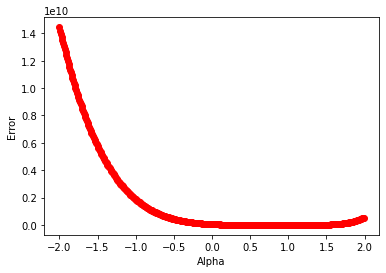

In [25]:
            
#the input variables are first define as placeholder 
# a placeholder is a variable/data which will be assigned later 
# image vector & label
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes


if not os.path.isdir('./logs/'):
    os.makedirs('./logs/')

#defines a session
sess = tf.Session()


with tf.variable_scope("Yufei_Mnist_01", reuse=tf.AUTO_REUSE):
    #opt neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_opt = inference1(x)
    
    #compute the cost 
    cost_opt = loss(output_opt, y)
    
    saver = tf.train.Saver() 
    
    var_list_opt = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b", 
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "output/W", "output/b"]
    
    var_list_opt = [tf.get_variable(v) for v in var_list_opt]
    
    #restore values of parameters saved previously
    #remember to download the model checkpoints files from canvas and save them in the corresponding path
    saver.restore(sess, log_files_path + 'Yufei_Mnist_01/model-checkpoint-98280')


    
with tf.variable_scope("Yufei_Mnist_01_init", reuse=tf.AUTO_REUSE):
    #rand neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_rand = inference1(x)
    #compute the rand cost
    cost_rand = loss(output_rand, y)
    
    var_list_rand = ["hidden_layer_1/W", "hidden_layer_1/b", 
                     "hidden_layer_2/W", "hidden_layer_2/b", 
                     "hidden_layer_3/W", "hidden_layer_3/b", 
                     "hidden_layer_4/W", "hidden_layer_4/b",
                     
                     "output/W", "output/b"]
    
    var_list_rand = [tf.get_variable(v) for v in var_list_rand]
    
    #initialization of the variables
    init_op = tf.variables_initializer(var_list_rand)
    
    sess.run(init_op)

    

#dictionary for the test dataset 
#used to evaluate accuracy 
feed_dict = {
        x: x_test,
        y: y_test,
}


#compute the loss for opt and rand networks
print(sess.run([cost_opt, cost_rand], feed_dict=feed_dict))


with tf.variable_scope("Yufei_Mnist_01_inter") as scope:
    #initialize the placeholder alpha coefficient 
    #a placeholder is a variable/data which will be assigned later 
    alpha = tf.placeholder("float", [1, 1])
    
    #the coefficients of the opt and rand networks are modulated with the alpha coefficient
    h1_W_inter = var_list_opt[0] * (1.0 - alpha) + var_list_rand[0] * (alpha)
    h1_b_inter = var_list_opt[1] * (1.0 - alpha) + var_list_rand[1] * (alpha)
    #
    h2_W_inter = var_list_opt[2] * (1.0 - alpha) + var_list_rand[2] * (alpha)
    h2_b_inter = var_list_opt[3] * (1.0 - alpha) + var_list_rand[3] * (alpha)
    #
    h3_W_inter = var_list_opt[4] * (1.0 - alpha) + var_list_rand[4] * (alpha)
    h3_b_inter = var_list_opt[5] * (1.0 - alpha) + var_list_rand[5] * (alpha)
    
    h3_W_inter = var_list_opt[4] * (1.0 - alpha) + var_list_rand[4] * (alpha)
    h3_b_inter = var_list_opt[5] * (1.0 - alpha) + var_list_rand[5] * (alpha)
    
    h4_W_inter = var_list_opt[6] * (1.0 - alpha) + var_list_rand[6] * (alpha)
    h4_b_inter = var_list_opt[7] * (1.0 - alpha) + var_list_rand[7] * (alpha)
    
    o_W_inter  = var_list_opt[8] * (1.0 - alpha) + var_list_rand[8] * (alpha)
    o_b_inter  = var_list_opt[9] * (1.0 - alpha) + var_list_rand[9] * (alpha)
    
    h1_inter = tf.nn.relu(tf.matmul(x,        h1_W_inter) + h1_b_inter)
    h2_inter = tf.nn.relu(tf.matmul(h1_inter, h2_W_inter) + h2_b_inter)
    h3_inter = tf.nn.relu(tf.matmul(h2_inter, h3_W_inter) + h3_b_inter)
    h4_inter = tf.nn.relu(tf.matmul(h3_inter, h4_W_inter) + h4_b_inter)
    o_inter  = tf.nn.relu(tf.matmul(h4_inter, o_W_inter ) + o_b_inter)
    
    cost_inter = loss(o_inter, y)
    tf.summary.scalar("interpolated_cost", cost_inter)  
    
#save the parameters for plotting in tensorboard
summary_writer = tf.summary.FileWriter( log_files_path + 'linear_interpolation_41/', sess.graph)
summary_op = tf.summary.merge_all()

#list to save the results of the following for loop
results = []
alphaMin = -2
alphaMax = 2
alphaStep = 0.01
for a in np.arange(alphaMin, alphaMax, alphaStep):
    #test data with different values of alpha coefficient
    feed_dict = {
            x: x_test,
            y: y_test,
            alpha: [[a]],
            }
    #compute the loss for the different value of alpha
    [cost, summary_str] = sess.run([cost_inter, summary_op], feed_dict=feed_dict)
    summary_writer.add_summary(summary_str, (a + alphaMax)/alphaStep)
    results.append(cost)

plt.plot(np.arange(alphaMin, alphaMax, alphaStep), results, 'ro')
plt.ylabel('Error')
plt.xlabel('Alpha')
plt.show()

# For problem 1 (2) (Rerun the code for problem 1 (2) and continue)

Weight Matrix: <tf.Variable 'Yufei_Mnist_02/hidden_layer_1/W:0' shape=(784, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/hidden_layer_1/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_02/hidden_layer_2/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/hidden_layer_2/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_02/hidden_layer_3/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/hidden_layer_3/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_02/hidden_layer_4/W:0' shape=(50, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/hidden_layer_4/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'Yufei_Mnist_02/output/W:0' shape=(50, 10) dtype=float32_ref>
Bias Vector: <tf.Variable 'Yufei_Mnist_02/output/b:0' shape=(10,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from C:/Users/Frederica

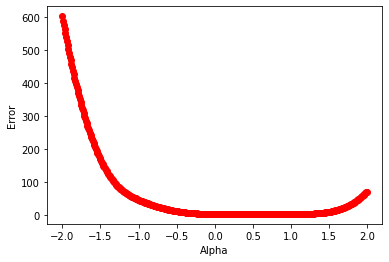

In [27]:
            
#the input variables are first define as placeholder 
# a placeholder is a variable/data which will be assigned later 
# image vector & label
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes


if not os.path.isdir('./logs/'):
    os.makedirs('./logs/')

    
#defines a session
sess = tf.Session()


with tf.variable_scope("Yufei_Mnist_02", reuse=tf.AUTO_REUSE):
    #opt neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_opt = inference2(x)
    
    #compute the cost 
    cost_opt = loss(output_opt, y)
    
    saver = tf.train.Saver() 
    
    var_list_opt = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b", 
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "output/W", "output/b"]
    
    var_list_opt = [tf.get_variable(v) for v in var_list_opt]
    
    #restore values of parameters saved previously
    #remember to download the model checkpoints files from canvas and save them in the corresponding path
    saver.restore(sess, log_files_path + 'Yufei_Mnist_02/model-checkpoint-98280')


    
with tf.variable_scope("Yufei_Mnist_02_init", reuse=tf.AUTO_REUSE):
    #rand neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_rand = inference2(x)
    #compute the rand cost
    cost_rand = loss(output_rand, y)
    
    var_list_rand = ["hidden_layer_1/W", "hidden_layer_1/b", 
                     "hidden_layer_2/W", "hidden_layer_2/b", 
                     "hidden_layer_3/W", "hidden_layer_3/b", 
                     "hidden_layer_4/W", "hidden_layer_4/b",
                     
                     "output/W", "output/b"]
    
    var_list_rand = [tf.get_variable(v) for v in var_list_rand]
    
    #initialization of the variables
    init_op = tf.variables_initializer(var_list_rand)
    
    sess.run(init_op)

    

#dictionary for the test dataset 
#used to evaluate accuracy 
feed_dict = {
        x: x_test,
        y: y_test,
}


#compute the loss for opt and rand networks
print(sess.run([cost_opt, cost_rand], feed_dict=feed_dict))


with tf.variable_scope("Yufei_Mnist_02_inter") as scope:
    #initialize the placeholder alpha coefficient 
    #a placeholder is a variable/data which will be assigned later 
    alpha = tf.placeholder("float", [1, 1])
    
    #the coefficients of the opt and rand networks are modulated with the alpha coefficient
    h1_W_inter = var_list_opt[0] * (1.0 - alpha) + var_list_rand[0] * (alpha)
    h1_b_inter = var_list_opt[1] * (1.0 - alpha) + var_list_rand[1] * (alpha)
    #
    h2_W_inter = var_list_opt[2] * (1.0 - alpha) + var_list_rand[2] * (alpha)
    h2_b_inter = var_list_opt[3] * (1.0 - alpha) + var_list_rand[3] * (alpha)
    #
    h3_W_inter = var_list_opt[4] * (1.0 - alpha) + var_list_rand[4] * (alpha)
    h3_b_inter = var_list_opt[5] * (1.0 - alpha) + var_list_rand[5] * (alpha)
    
    h3_W_inter = var_list_opt[4] * (1.0 - alpha) + var_list_rand[4] * (alpha)
    h3_b_inter = var_list_opt[5] * (1.0 - alpha) + var_list_rand[5] * (alpha)
    
    h4_W_inter = var_list_opt[6] * (1.0 - alpha) + var_list_rand[6] * (alpha)
    h4_b_inter = var_list_opt[7] * (1.0 - alpha) + var_list_rand[7] * (alpha)
    
    o_W_inter  = var_list_opt[8] * (1.0 - alpha) + var_list_rand[8] * (alpha)
    o_b_inter  = var_list_opt[9] * (1.0 - alpha) + var_list_rand[9] * (alpha)
    
    h1_inter = tf.nn.relu(tf.matmul(x,        h1_W_inter) + h1_b_inter)
    h2_inter = tf.nn.relu(tf.matmul(h1_inter, h2_W_inter) + h2_b_inter)
    h3_inter = tf.nn.relu(tf.matmul(h2_inter, h3_W_inter) + h3_b_inter)
    h4_inter = tf.nn.relu(tf.matmul(h3_inter, h4_W_inter) + h4_b_inter)
    o_inter  = tf.nn.relu(tf.matmul(h4_inter, o_W_inter ) + o_b_inter)
    
    cost_inter = loss(o_inter, y)
    tf.summary.scalar("interpolated_cost", cost_inter)  
    
#save the parameters for plotting in tensorboard
summary_writer = tf.summary.FileWriter(log_files_path + 'linear_interpolation_42/', sess.graph)
summary_op = tf.summary.merge_all()

#list to save the results of the following for loop
results = []
alphaMin = -2
alphaMax = 2
alphaStep = 0.01
for a in np.arange(alphaMin, alphaMax, alphaStep):
    #test data with different values of alpha coefficient
    feed_dict = {
            x: x_test,
            y: y_test,
            alpha: [[a]],
            }
    #compute the loss for the different value of alpha
    [cost, summary_str] = sess.run([cost_inter, summary_op], feed_dict=feed_dict)
    summary_writer.add_summary(summary_str, (a + alphaMax)/alphaStep)
    results.append(cost)

plt.plot(np.arange(alphaMin, alphaMax, alphaStep), results, 'ro')
plt.ylabel('Error')
plt.xlabel('Alpha')
plt.show()